In [13]:
base_train = catalog.load("base_train")

[04/01/25 16:32:07] INFO     Loading data from base_train (ParquetDataset)...                   ]8;id=908827;file://C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_mac_proj\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=349330;file://C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_mac_proj\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

In [16]:
base_train['lat'].min()

33.8093

In [24]:
base_test = catalog.load("base_test")

[03/24/25 15:08:02] INFO     Loading data from base_test (ParquetDataset)...                    ]8;id=706918;file://C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_mac_proj\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=671141;file://C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_mac_proj\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

In [20]:
base_test

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
29350,33.9373,-118.1508,6,4,1,16,0.0
6911,34.0443,-118.4238,11,1,0,15,0.0
23696,34.0443,-118.2698,5,2,0,0,0.0
29743,33.8653,-118.1868,3,3,1,19,0.0
26082,33.9123,-118.3268,1,3,0,14,1.0
...,...,...,...,...,...,...,...
15151,34.0443,-118.2698,8,1,0,0,1.0
12072,34.0443,-118.2698,6,3,0,0,1.0
12537,34.0443,-118.2698,0,1,0,0,0.0
20600,33.8803,-118.3898,6,1,0,20,0.0


In [37]:
from pycaret.classification import *
setup(data=base_train, target='shot_made_flag', test_data=base_test, session_id=1146)
lr_model = create_model('lr')  # Default logistic regression model
tuned_lr = tune_model(lr_model)


,Description,Value
0,Session id,1146
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(20285, 7)"
4,Transformed data shape,"(20285, 7)"
5,Transformed train set shape,"(16228, 7)"
6,Transformed test set shape,"(4057, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5767,0.6046,0.5052,0.5626,0.5323,0.1478,0.1485
1,0.5613,0.5851,0.4703,0.5465,0.5056,0.1153,0.1163
2,0.5496,0.5631,0.4374,0.5347,0.4812,0.0902,0.0917
3,0.5779,0.5887,0.4748,0.5697,0.5179,0.1481,0.1500
4,0.5872,0.6023,0.4942,0.5794,0.5334,0.1674,0.1691
5,0.5576,0.5891,0.4658,0.5429,0.5014,0.1080,0.1090
6,0.5847,0.5999,0.5071,0.5737,0.5384,0.1636,0.1646
7,0.5638,0.5934,0.4852,0.5489,0.5151,0.1214,0.1221
8,0.6048,0.6289,0.4884,0.6067,0.5412,0.2012,0.2048


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5773,0.6050,0.5065,0.5632,0.5333,0.1491,0.1498
1,0.5625,0.5850,0.4716,0.5480,0.5069,0.1178,0.1188
2,0.5496,0.5634,0.4387,0.5346,0.4819,0.0904,0.0917
3,0.5792,0.5888,0.4761,0.5712,0.5194,0.1506,0.1525
4,0.5890,0.6023,0.4968,0.5816,0.5358,0.1712,0.1729
5,0.5576,0.5891,0.4658,0.5429,0.5014,0.1080,0.1090
6,0.5841,0.5999,0.5071,0.5729,0.5380,0.1624,0.1634
7,0.5638,0.5937,0.4877,0.5486,0.5164,0.1216,0.1223
8,0.6036,0.6290,0.4884,0.6048,0.5404,0.1988,0.2023


<IPython.core.display.HTML object>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│   2 setup(data=base_train, target='shot_made_flag', test_data=base_test, session_id=1146)        │
│   3 lr_model = create_model('lr')  # Default logistic regression model                           │
│   4 tuned_lr = tune_model(lr_model)                                                              │
│ ❱ 5 model_info = get_config('tuned_lr')                                                          │
│   6 print("Model Name:", model_info.__class__.__name__)                                          │
│   7                                                                                              │
│                                                                                                  │
│ C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_ │
│ mac_proj\Lib\site-packages\pycaret\utils\generic.py:964 in wrapper                               │
│                                                                                                  │
│    961 │   │   │   for name, message in global_names.items():                                    │
│    962 │   │   │   │   if globals_d[name] is None:                                               │
│    963 │   │   │   │   │   raise ValueError(message)                                             │
│ ❱  964 │   │   │   return func(*args, **kwargs)                                                  │
│    965 │   │                                                                                     │
│    966 │   │   return wrapper                                                                    │
│    967                                                                                           │
│                                                                                                  │
│ C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_ │
│ mac_proj\Lib\site-packages\pycaret\classification\functional.py:2771 in get_config               │
│                                                                                                  │
│   2768 │                                                                                         │
│   2769 │   """                                                                                   │
│   2770 │                                                                                         │
│ ❱ 2771 │   return _CURRENT_EXPERIMENT.get_config(variable=variable)                              │
│   2772                                                                                           │
│   2773                                                                                           │
│   2774 @check_if_global_is_not_none(globals(), _CURRENT_EXPERIMENT_DECORATOR_DICT)               │
│                                                                                                  │
│ C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_ │
│ mac_proj\Lib\site-packages\pycaret\internal\pycaret_experiment\pycaret_experiment.py:310 in      │
│ get_config                                                                                       │
│                                                                                                  │
│   307 │   │   │   return variable_and_property_keys                                              │
│   308 │   │                                                                                      │
│   309 │   │   if variable not in variable_and_property_keys:                                     │
│ ❱ 310 │   │   │   raise ValueError(                        

In [16]:
print(tuned_lr)

LogisticRegression(C=7.275, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1146, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [25]:
test_predictions = predict_model(tuned_lr, data=base_test)
test_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5822,0.6026,0.4827,0.5743,0.5245,0.1569,0.1588


,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
29350,33.937302,-118.150803,6,4,1,16,0.0,0,0.6120
6911,34.044300,-118.423798,11,1,0,15,0.0,0,0.5536
23696,34.044300,-118.269798,5,2,0,0,0.0,1,0.5963
29743,33.865299,-118.186798,3,3,1,19,0.0,0,0.6278
26082,33.912300,-118.326797,1,3,0,14,1.0,0,0.5673
...,...,...,...,...,...,...,...,...,...
15151,34.044300,-118.269798,8,1,0,0,1.0,1,0.6152
12072,34.044300,-118.269798,6,3,0,0,1.0,1,0.5890
12537,34.044300,-118.269798,0,1,0,0,0.0,1,0.5916
20600,33.880299,-118.389801,6,1,0,20,0.0,0,0.5941


In [28]:
from sklearn.metrics import log_loss

# Extract probabilities and true labels
probabilities = test_predictions[['prediction_score']]  # 'Score' contains predicted probabilities
true_labels = test_predictions['shot_made_flag']

# Calculate log loss
log_loss_value = log_loss(true_labels, probabilities)
log_loss_value

0.7195821024481877

In [30]:
test_predictions

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
29350,33.937302,-118.150803,6,4,1,16,0.0,0,0.6120
6911,34.044300,-118.423798,11,1,0,15,0.0,0,0.5536
23696,34.044300,-118.269798,5,2,0,0,0.0,1,0.5963
29743,33.865299,-118.186798,3,3,1,19,0.0,0,0.6278
26082,33.912300,-118.326797,1,3,0,14,1.0,0,0.5673
...,...,...,...,...,...,...,...,...,...
15151,34.044300,-118.269798,8,1,0,0,1.0,1,0.6152
12072,34.044300,-118.269798,6,3,0,0,1.0,1,0.5890
12537,34.044300,-118.269798,0,1,0,0,0.0,1,0.5916
20600,33.880299,-118.389801,6,1,0,20,0.0,0,0.5941


In [31]:
from sklearn.metrics import f1_score
predicted_labels = test_predictions['prediction_label']
f1 = f1_score(true_labels, predicted_labels)
f1

0.5245441795231417

In [1]:
mlflow models serve -m runs:/c72493264c9147eb88437811c3941233/model -p 5000

╭──────────────────────────────────────────────────────────────────────────────────────────────────╮
│ mlflow models serve -m runs:/c72493264c9147eb88437811c3941233/model -p 5000                      │
│        ▲                                                                                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: invalid syntax

In [3]:
import mlflow
print(mlflow.get_tracking_uri())

file:///C:/Users/Kleber/Documents/curso_intel_artificial/eng_machine_learning/eng_machine_proj_3/kedro-eng-mac-proj-3/mlruns


In [19]:
dev = catalog.load("data_filtered_dev")
dev

[03/27/25 19:50:58] INFO     Loading data from data_filtered_dev (ParquetDataset)...            ]8;id=204462;file://C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_mac_proj\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=612205;file://C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_mac_proj\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
5,34.0553,-118.4148,9,3,0,14,0.0
...,...,...,...,...,...,...,...
30690,33.9443,-118.3828,11,4,1,15,0.0
30691,34.0443,-118.2698,7,4,1,0,0.0
30692,33.9963,-118.2688,6,4,1,4,0.0
30694,33.8783,-118.4038,3,4,1,21,1.0


In [27]:
prod = catalog.load("data_filtered_prod")
prod

[03/27/25 20:00:43] INFO     Loading data from data_filtered_prod (ParquetDataset)...           ]8;id=577319;file://C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_mac_proj\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=461818;file://C:\Users\Kleber\Documents\curso_intel_artificial\eng_machine_learning\eng_machine_proj\virt_eng_mac_proj\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
10,33.8063,-118.3638,1,3,0,25,0.0
17,33.8183,-118.3868,8,2,0,25,1.0
27,33.8583,-118.4528,0,3,0,26,0.0
39,33.7723,-118.2968,0,2,0,27,1.0
55,33.8503,-118.4248,2,1,0,24,0.0
...,...,...,...,...,...,...,...
30675,33.8283,-118.4038,2,1,1,25,0.0
30681,33.7833,-118.2878,0,2,1,26,1.0
30685,33.7943,-118.1888,7,3,1,26,0.0
30689,33.3653,-118.2818,0,3,1,67,0.0


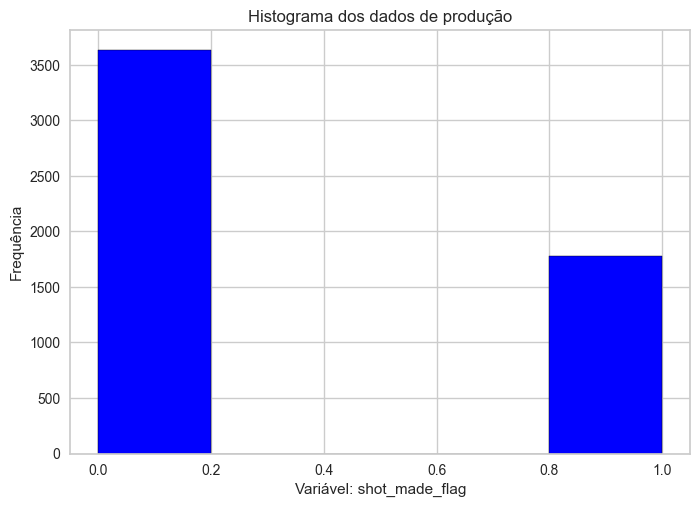

In [60]:
import matplotlib.pyplot as plt
# Create the histogram
plt.hist(prod['shot_made_flag'], bins=5, color='blue', edgecolor='black')
# Add labels and title
plt.xlabel('Variável: shot_made_flag')
plt.ylabel('Frequência')
plt.title('Histograma dos dados de produção')

# Show the plot
plt.savefig('C:/Users/Kleber/Documents/curso_intel_artificial/eng_machine_learning/histogram_prod_shot_made_flag.png', format='png')
# plt.show()


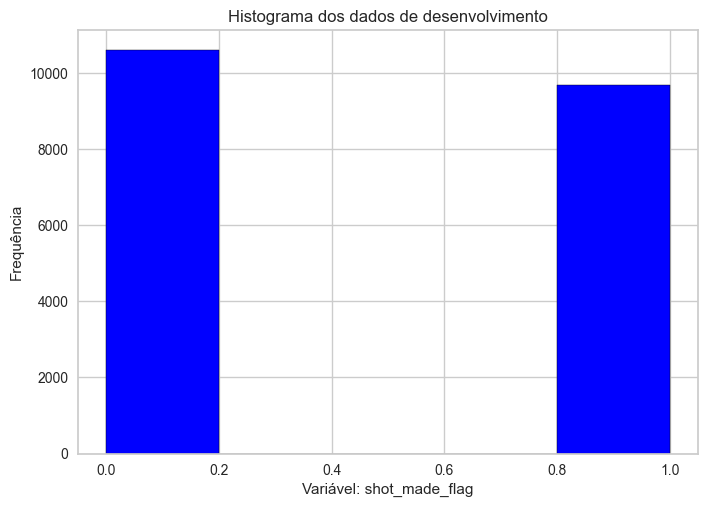

In [61]:
import matplotlib.pyplot as plt
# Create the histogram
plt.hist(dev['shot_made_flag'], bins=5, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Variável: shot_made_flag')
plt.ylabel('Frequência')
plt.title('Histograma dos dados de desenvolvimento')

# Show the plot
plt.savefig('C:/Users/Kleber/Documents/curso_intel_artificial/eng_machine_learning/histogram_dev_shot_made_flag.png', format='png')
# plt.show()